# Data Visualisation

## Dataset - College Majors of Recent Graduates

#### Headers for recent-grads.csv are shown below:

#### Header:               Description
#### Rank:	              Rank by median earnings
#### Major_code:	          Major code, FO1DP in ACS PUMS
#### Major:	              Major description
#### Major_category:	      Category of major from Carnevale et al
#### Total:	              Total number of people with major
#### Sample_size:	      Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
#### Men:	              Male graduates
#### Women:	              Female graduates
#### ShareWomen:	          Women as share of total
#### Employed:	          Number employed (ESR == 1 or 2)
#### Full_time:	          Employed 35 hours or more
#### Part_time:	          Employed less than 35 hours
#### Full_time_year_round: Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
#### Unemployed:	          Number unemployed (ESR == 3)
#### Unemployment_rate:	  Unemployed / (Unemployed + Employed)
#### Median:               Median earnings of full-time, year-round workers
#### P25th:	              25th percentile of earnings
#### P75th:	              75th percentile of earnings
#### College_jobs:	      Number with job requiring a college degree
#### Non_college_jobs:	  Number with job not requiring a college degree
#### Low_wage_jobs:	      Number in low-wage service jobs

###  Importing the libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

### Importing the dataset

In [3]:
dataset = pd.read_csv('grads.csv')

In [4]:
dataset.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


#### Number of rows and columns of the dataset

In [6]:
dataset.shape

(173, 21)

#### Statistics of each column

In [7]:
dataset.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


#### Dropping unnecessary columns

In [8]:
dataset=dataset.drop(['ShareWomen', 'Sample_size','Full_time_year_round','College_jobs','Non_college_jobs','Low_wage_jobs'], axis = 1)

In [9]:
dataset.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,Employed,Full_time,Part_time,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,1976,1849,270,37,0.018381,110000,95000,125000
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,640,556,170,85,0.117241,75000,55000,90000
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,648,558,133,16,0.024096,73000,50000,105000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,758,1069,150,40,0.050125,70000,43000,80000
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,25694,23170,5180,1672,0.061098,65000,50000,75000
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,1857,2038,264,400,0.177226,65000,50000,102000
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,2912,2924,296,308,0.095652,62000,53000,72000
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,1526,1085,553,33,0.021167,62000,31500,109000
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,76442,71298,13101,4650,0.057342,60000,48000,70000
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,61928,55450,12695,3895,0.059174,60000,45000,72000


#### Checking for null values

In [10]:
dataset.isnull().sum(axis=0)

Rank                 0
Major_code           0
Major                0
Total                1
Men                  1
Women                1
Major_category       0
Employed             0
Full_time            0
Part_time            0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

#### Dropping null values

In [11]:
dataset = dataset.dropna()

In [12]:
dataset.isnull().sum(axis=0)

Rank                 0
Major_code           0
Major                0
Total                0
Men                  0
Women                0
Major_category       0
Employed             0
Full_time            0
Part_time            0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

#### Datatype of each feature

In [13]:
dataset.dtypes

Rank                   int64
Major_code             int64
Major                 object
Total                float64
Men                  float64
Women                float64
Major_category        object
Employed               int64
Full_time              int64
Part_time              int64
Unemployed             int64
Unemployment_rate    float64
Median                 int64
P25th                  int64
P75th                  int64
dtype: object

### Data Visualisation

#### Number of people in each Major Category

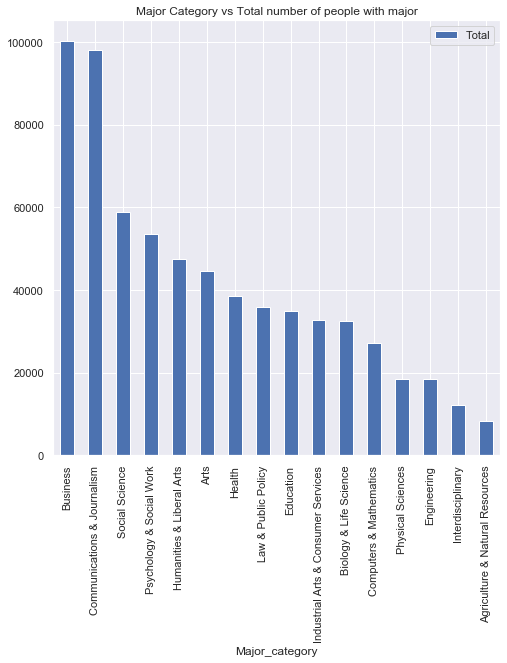

In [70]:
datasetbar = pd.DataFrame(dataset.groupby(['Major_category'])['Total'].mean().sort_values(ascending = False))
datasetbar.plot.bar()
plt.title('Major Category vs Total number of people with major')
plt.show()

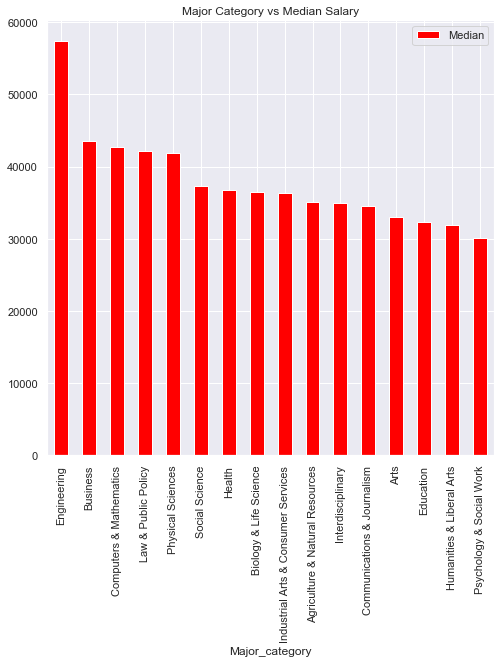

In [71]:
datasetbar = pd.DataFrame(dataset.groupby(['Major_category'])['Median'].mean().sort_values(ascending = False))
datasetbar.plot.bar(color='red')
plt.title('Major Category vs Median Salary')
plt.show()

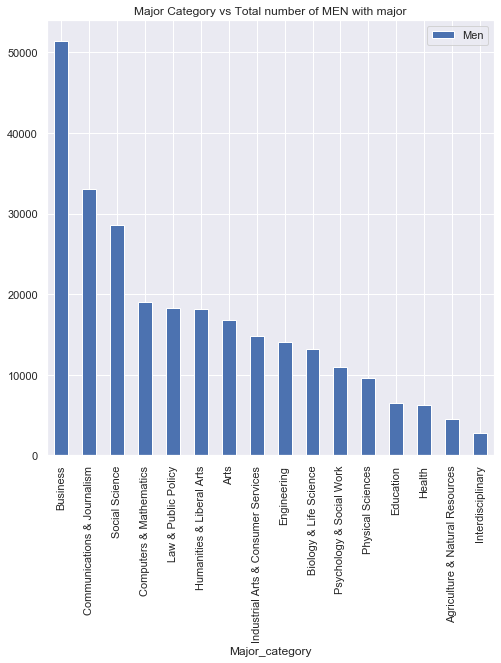

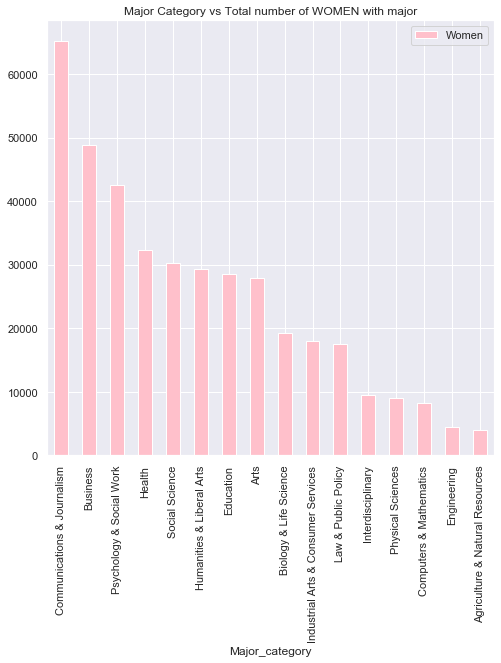

In [75]:
datasetbar1 = pd.DataFrame(dataset.groupby(['Major_category'])['Men'].mean().sort_values(ascending = False))
datasetbar1.plot.bar()
plt.title('Major Category vs Total number of MEN with major')
datasetbar2 = pd.DataFrame(dataset.groupby(['Major_category'])['Women'].mean().sort_values(ascending = False))
datasetbar2.plot.bar(color='pink')
plt.title('Major Category vs Total number of WOMEN with major')
plt.show()


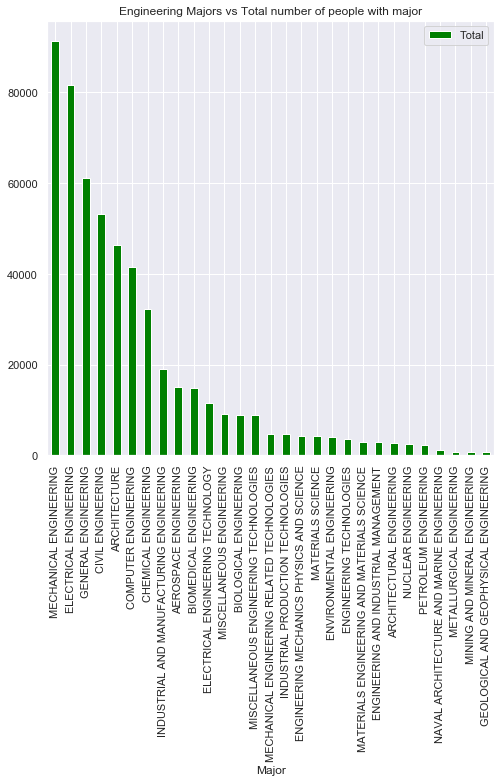

In [76]:
df=dataset.where(dataset['Major_category']=='Engineering')
dfbar = pd.DataFrame(df.groupby(['Major'])['Total'].mean().sort_values(ascending = False))
dfbar.plot.bar(color='green')
plt.title('Engineering Majors vs Total number of people with major')
plt.show()

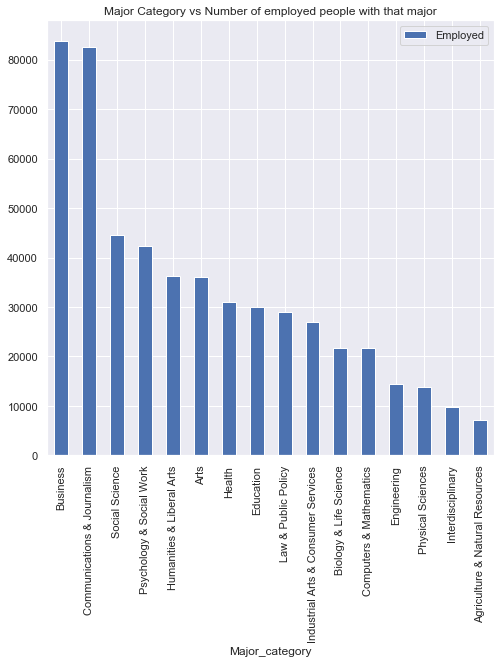

In [62]:
datasetbar = pd.DataFrame(dataset.groupby(['Major_category'])['Employed'].mean().sort_values(ascending = False))
datasetbar.plot.bar()
plt.title('Major Category vs Number of employed people with that major')
plt.show()

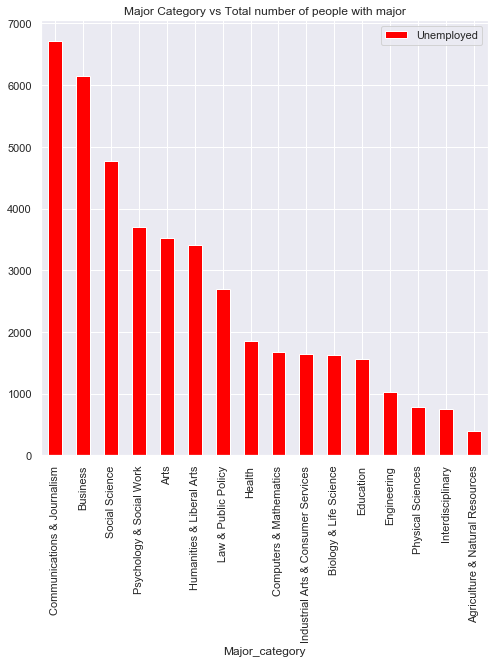

In [77]:
datasetbar = pd.DataFrame(dataset.groupby(['Major_category'])['Unemployed'].mean().sort_values(ascending = False))
datasetbar.plot.bar(color='red')
plt.title('Major Category vs Total number of people with major')
plt.show()

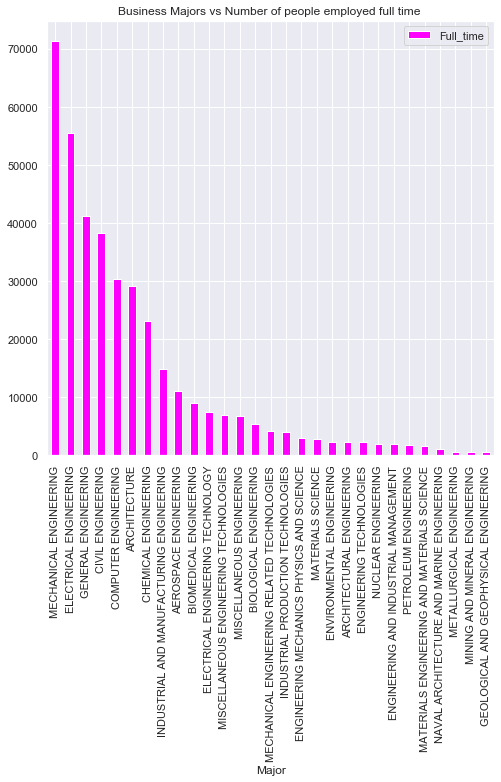

In [78]:
df1=dataset.where(dataset['Major_category']=='Business')
df1bar = pd.DataFrame(df.groupby(['Major'])['Full_time'].mean().sort_values(ascending = False))
df1bar.plot.bar(color='fuchsia')
plt.title('Business Majors vs Number of people employed full time ')
plt.show()